# Population by Country
This dataset both countries and dependent territories. Data based on the latest United Nations Population Division estimates.



## Data Description


| Variables | Explanation of variable |
| :----- | :----- |
| **Country (or dependency)** | country name |
| **Population (2020)** | the data is on 2020 population. |
| **Yearly Change** | here we see the change yearly in population. |
| **Net Change** | The net change in population yearly. |
| **Density (P/Km�)** | opulation density is the number of people per unit of area, usually quoted per square kilometer or square mile. |
| **Land Area (Km�)** | The average population in each country. |
| **Migrants (net)** | regular and periodic movements of the population away from home country. | 
| **Fert. Rate** | average number of children born to women during their reproductive years . | 
| **Med. Age** | Median age is the age that divides a population into two numerically equally sized groups; that is, half the people are younger than this age and half are older. | 
| **Urban Pop %** | Urban population is the total population living in areas termed as urban by that country. | 
| **World Share** | The Earth has a human population of 7.88 billion, with an overall population density of 50 people per km 2, excluding Antarctica. | 


In [62]:
# all libraries
import requests
import csv
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import missingno as msno

## scrape the table properly using BeautifulSoup.

In [12]:
# using url for scrapping data.
url = requests.get('https://www.worldometers.info/world-population/population-by-country/')

In [13]:
soup = bs(url.content, 'html.parser')     # here i am calling html content or url.

In [14]:
filename = 'test.csv'      # making name of file.

In [15]:
csv_writer = csv.writer(open(filename,'w'))     # making file with write command.

In [31]:
# here i am finding h1 tang or heading.
heading = soup.find("h1")
heading

<h1>Countries in the world by population (2022)</h1>

In [32]:
print(heading.text)      # here we can see the heading with text function.

Countries in the world by population (2022)


In [40]:
# in this loop i am extracting my file.

# calling table row.
for tr in soup.find_all("tr"):
    data = []
    
    # table heading with table row.
    for th in tr.find_all("th"):
        data.append(th.text)
    
    # using for loop for inserting headers and join data.
    if(data):
        print("Inserting headers: {}".format(','.join(data)))
        csv_writer.writerow(data)
        continue
    
    # using strip function to strip from left and right.
    for td in tr.find_all("td"):
        data.append(td.text.strip())
    
    # in the last, file making process.
    if(data):
        print("Insertind data: {}".format(','.join(data)))
        csv_writer.writerow(data)

Inserting headers: #,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Insertind data: 1,China,1,439,323,776,0.39 %,5,540,090,153,9,388,211,-348,399,1.7,38,61 %,18.47 %
Insertind data: 2,India,1,380,004,385,0.99 %,13,586,631,464,2,973,190,-532,687,2.2,28,35 %,17.70 %
Insertind data: 3,United States,331,002,651,0.59 %,1,937,734,36,9,147,420,954,806,1.8,38,83 %,4.25 %
Insertind data: 4,Indonesia,273,523,615,1.07 %,2,898,047,151,1,811,570,-98,955,2.3,30,56 %,3.51 %
Insertind data: 5,Pakistan,220,892,340,2.00 %,4,327,022,287,770,880,-233,379,3.6,23,35 %,2.83 %
Insertind data: 6,Brazil,212,559,417,0.72 %,1,509,890,25,8,358,140,21,200,1.7,33,88 %,2.73 %
Insertind data: 7,Nigeria,206,139,589,2.58 %,5,175,990,226,910,770,-60,000,5.4,18,52 %,2.64 %
Insertind data: 8,Bangladesh,164,689,383,1.01 %,1,643,222,1,265,130,170,-369,501,2.1,28,39 %,2.11 %
Insertind data: 9,Russia,145,934,462,0.04 

## basic data cleaning steps

In [77]:
# dataset.
population = pd.read_csv('test_123.csv')

In [78]:
population.head()   # head of the dataset.

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km�),Land Area (Km�),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38.0,61%,18.47%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28.0,35%,17.70%
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
population.tail()     # tail of the dataset.

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km�),Land Area (Km�),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
377,189.0,Samoa,"198,414",0.67%,"1,317",70,"2,830","-2,803",3.9,22.0,18%,0.00%
378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,190.0,Saint Lucia,"183,627",0.46%,837,301,610,0,1.4,34.0,19%,0.00%
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,191.0,Channel Islands,"173,863",0.93%,"1,604",915,190,"1,351",1.5,43.0,30%,0.00%


In [80]:
population.isnull()     # checking null values.

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km�),Land Area (Km�),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
377,False,False,False,False,False,False,False,False,False,False,False,False
378,True,True,True,True,True,True,True,True,True,True,True,True
379,False,False,False,False,False,False,False,False,False,False,False,False
380,True,True,True,True,True,True,True,True,True,True,True,True


In [81]:
population.isnull().sum()     # here i am checking total null values.

#                          191
Country (or dependency)    191
Population (2020)          191
Yearly Change              191
Net Change                 191
Density (P/Km�)            191
Land Area (Km�)            191
Migrants (net)             191
Fert. Rate                 191
Med. Age                   191
Urban Pop %                191
World Share                191
dtype: int64

In [82]:
population.drop_duplicates()    # here i am dropping duplicate values in rows.

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km�),Land Area (Km�),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38.0,61%,18.47%
3,2.0,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28.0,35%,17.70%
5,3.0,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38.0,83%,4.25%
7,4.0,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30.0,56%,3.51%
...,...,...,...,...,...,...,...,...,...,...,...,...
373,187.0,Mayotte,"272,815",2.50%,"6,665",728,375,0,3.7,20.0,46%,0.00%
375,188.0,Sao Tome & Principe,"219,159",1.91%,"4,103",228,960,"-1,680",4.4,19.0,74%,0.00%
377,189.0,Samoa,"198,414",0.67%,"1,317",70,"2,830","-2,803",3.9,22.0,18%,0.00%
379,190.0,Saint Lucia,"183,627",0.46%,837,301,610,0,1.4,34.0,19%,0.00%


In [83]:
population.nunique()    # checking nuniqness in columns.

#                          191
Country (or dependency)    191
Population (2020)          191
Yearly Change              152
Net Change                 191
Density (P/Km�)            133
Land Area (Km�)            190
Migrants (net)             153
Fert. Rate                  50
Med. Age                    34
Urban Pop %                 75
World Share                 74
dtype: int64

In [84]:
population = population.drop(['#'], axis=1)     # dropping unnecessary column.

## rename the columns appropriately.

In [85]:
# here i am renaming all columns.
population = population.rename(columns={'Country (or dependency)':'country','Population (2020)':'population','Yearly Change':'yearly_change','Net Change':'net_change','Density (P/Km�)':'density','Land Area (Km�)':'land_area','Migrants (net)':'migrants','Fert. Rate':'fert_rate','Med. Age':'med_age','Urban Pop %':'urban_pop','World Share':'world_share'})
population

,country,population,yearly_change,net_change,density,land_area,migrants,fert_rate,med_age,urban_pop,world_share
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38.0,61%,18.47%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28.0,35%,17.70%
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
377,Samoa,"198,414",0.67%,"1,317",70,"2,830","-2,803",3.9,22.0,18%,0.00%
378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,Saint Lucia,"183,627",0.46%,837,301,610,0,1.4,34.0,19%,0.00%
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
population.info()      # here i am checking Datatype of all columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        191 non-null    object 
 1   population     191 non-null    object 
 2   yearly_change  191 non-null    object 
 3   net_change     191 non-null    object 
 4   density        191 non-null    object 
 5   land_area      191 non-null    object 
 6   migrants       191 non-null    object 
 7   fert_rate      191 non-null    float64
 8   med_age        191 non-null    float64
 9   urban_pop      191 non-null    object 
 10  world_share    191 non-null    object 
dtypes: float64(2), object(9)
memory usage: 33.0+ KB


In [87]:
# here i am using coerce method to convert object into float or int.
# but in population column i did face problem to convert it.

population['yearly_change'] = pd.to_numeric(population['yearly_change'], errors='coerce')
population['net_change'] = pd.to_numeric(population['net_change'], errors='coerce')
population['density'] = pd.to_numeric(population['density'], errors='coerce')
population['land_area'] = pd.to_numeric(population['land_area'], errors='coerce')
population['migrants'] = pd.to_numeric(population['migrants'], errors='coerce')
population['urban_pop'] = pd.to_numeric(population['urban_pop'], errors='coerce')
population['world_share'] = pd.to_numeric(population['world_share'], errors='coerce')
#population['population'] = pd.to_numeric(population['population'], errors='coerce')

In [88]:
# here i am changing datatype of all columns.

population['country'] = population['country'].astype('category')
population['yearly_change'] = population['yearly_change'].astype('float')
population['net_change'] = population['net_change'].astype('float')
#population['population'] = population['population'].astype('float')
population['density'] = population['density'].astype('float')
population['land_area'] = population['land_area'].astype('float')
population['migrants'] = population['migrants'].astype('float')

In [90]:
population.describe(include='all')    # so, this is summary of all columns.

,country,population,yearly_change,net_change,density,land_area,migrants,fert_rate,med_age,urban_pop,world_share
count,191,191,0.0,8.000000,184.000000,11.000000,16.000000,191.000000,191.000000,0.0,0.0
unique,191,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,"126,476,461",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,266.375000,141.059783,488.636364,-53.062500,2.708901,30.471204,NaN,NaN
std,NaN,NaN,NaN,418.237778,174.396608,279.249807,591.737495,1.286396,9.198281,NaN,NaN
min,NaN,NaN,NaN,-289.000000,2.000000,30.000000,-960.000000,1.100000,15.000000,NaN,NaN
25%,NaN,NaN,NaN,29.750000,29.000000,310.000000,-560.000000,1.700000,22.000000,NaN,NaN
50%,NaN,NaN,NaN,181.500000,80.000000,430.000000,0.000000,2.300000,30.000000,NaN,NaN
75%,NaN,NaN,NaN,471.750000,156.500000,700.000000,335.000000,3.600000,39.000000,NaN,NaN


## report if there is any missing value in the dataset. (Do not remove or fill it)

<AxesSubplot:>

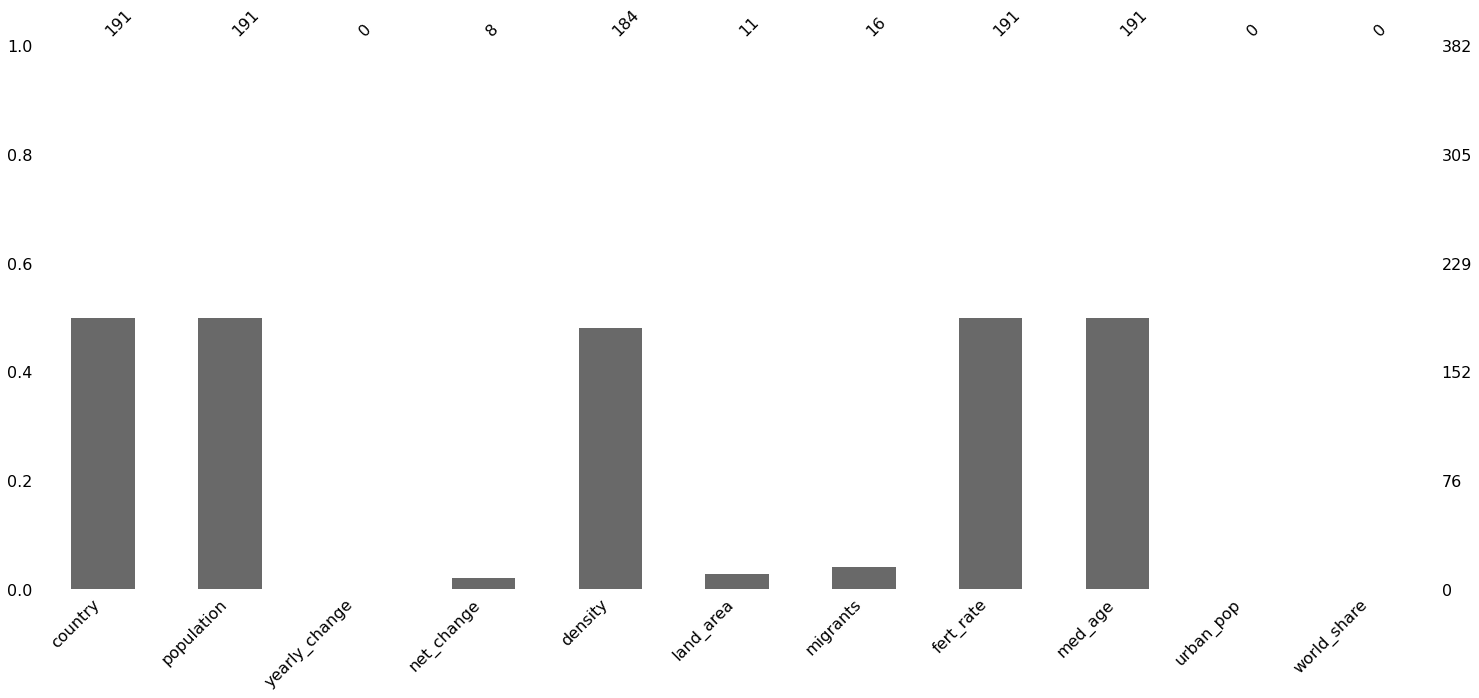

In [91]:
msno.bar(population)    # here i am finding missing values in it.
                        # every columns contains lot's of missing values.

<AxesSubplot:>

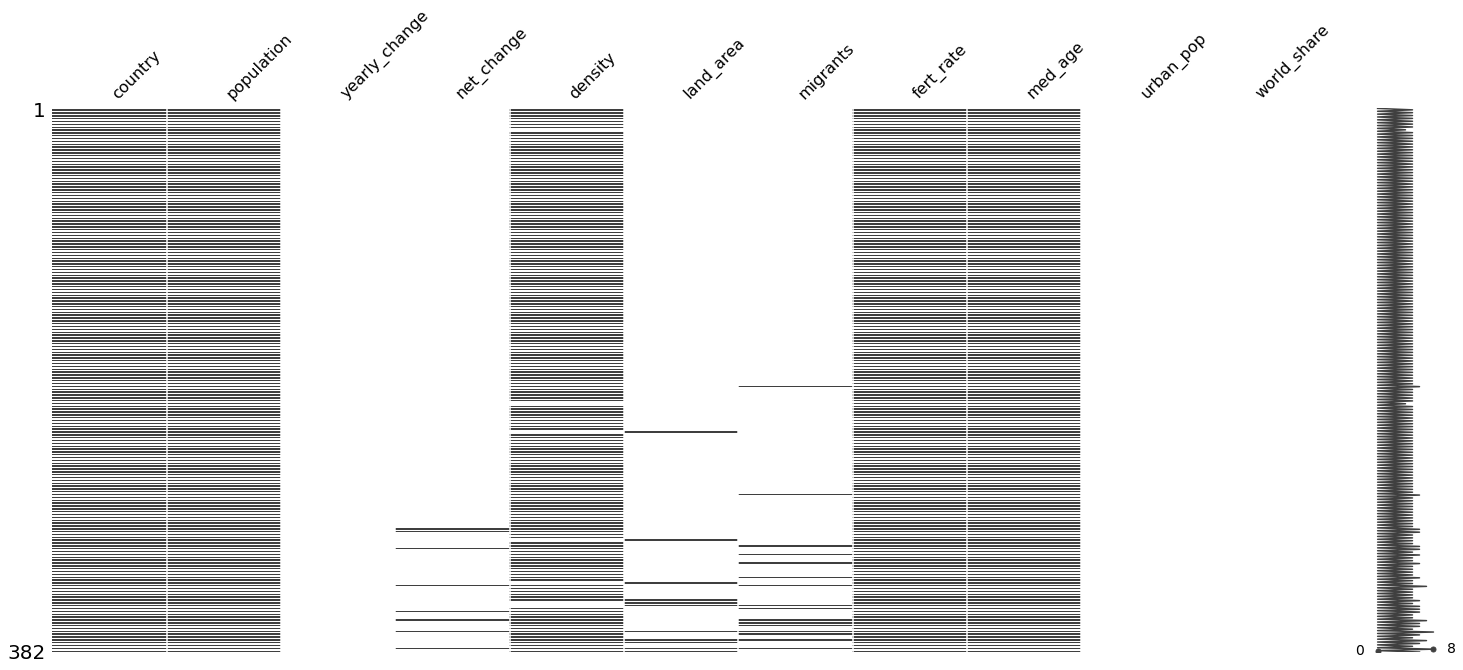

In [92]:
msno.matrix(population)    # here i am checking the pattern in it.

<AxesSubplot:>

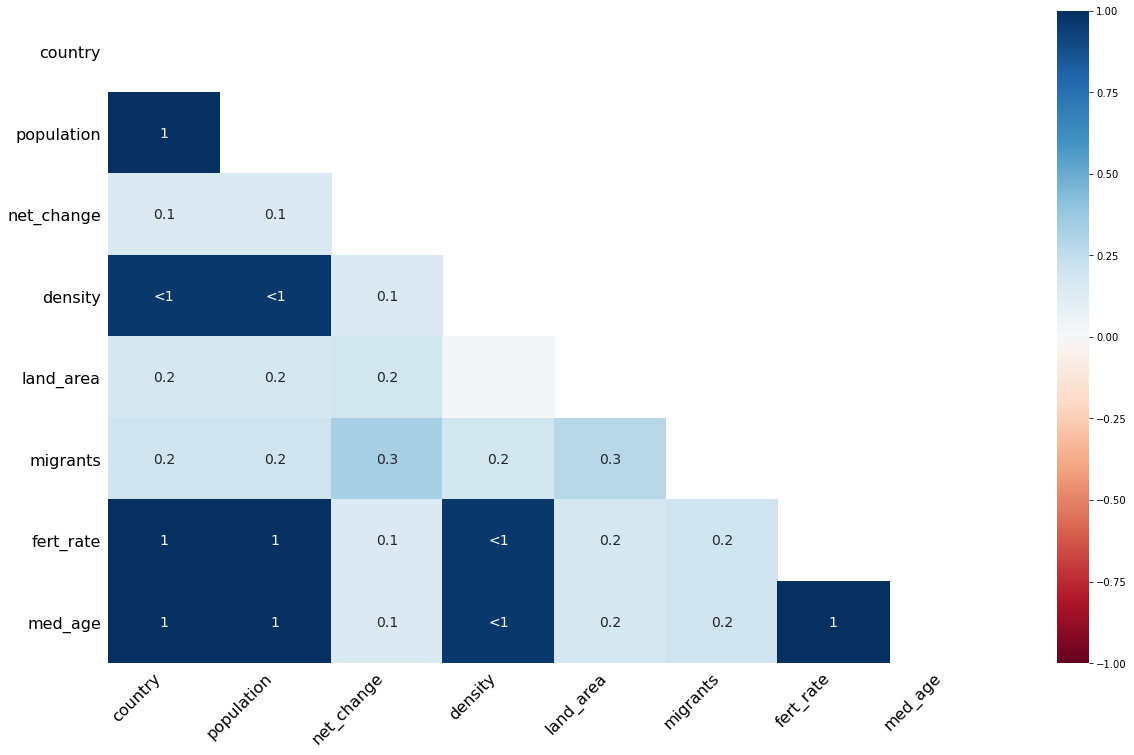

In [93]:
msno.heatmap(population)    # usig heat map to understand the coorelation between all the columns.

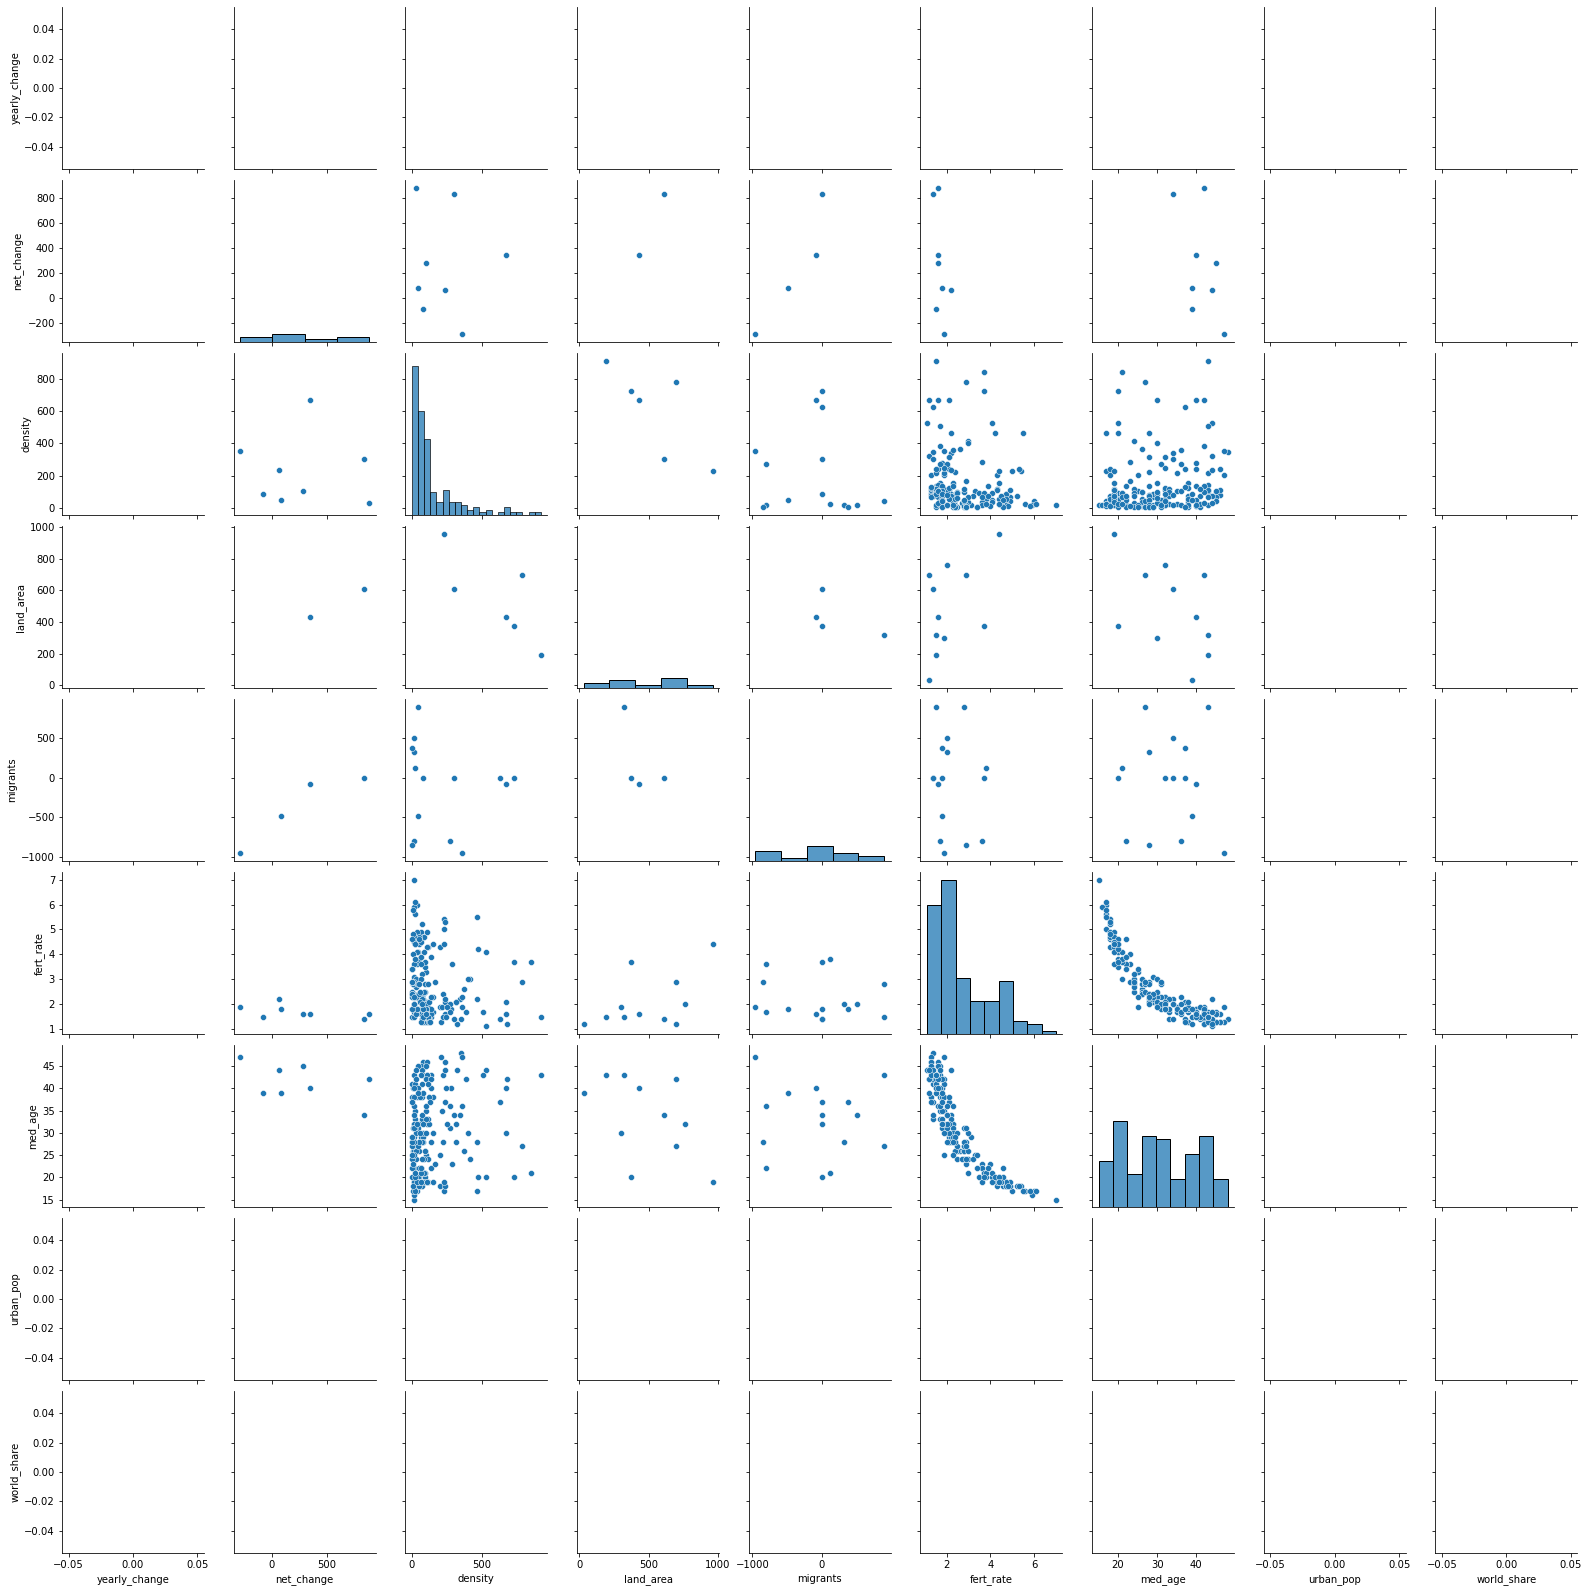

In [94]:
sns.pairplot(population)   # using pair plot to know the relation of all the columns and skewness.

C:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


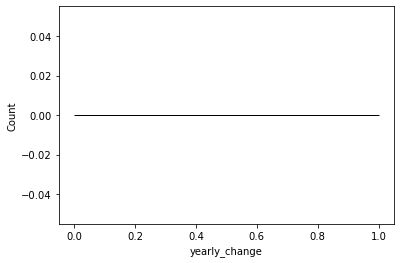

In [97]:
# here i am chcking yearly change column but here i did not find exact answer.
sns.histplot(data=population['yearly_change'],kde=True)
plt.axvline(x=population.yearly_change.mean(),c='red', alpha=0.5, label='mean')
plt.axvline(x=population.yearly_change.median(), c='blue', alpha= 0.5, ls='--', label='median')

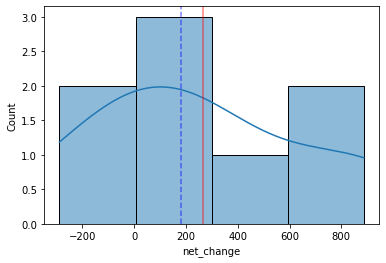

In [98]:
# here we can see net change is slightly similar to normal.
sns.histplot(data=population['net_change'],kde=True)
plt.axvline(x=population.net_change.mean(),c='red', alpha=0.5, label='mean')
plt.axvline(x=population.net_change.median(), c='blue', alpha= 0.5, ls='--', label='median')

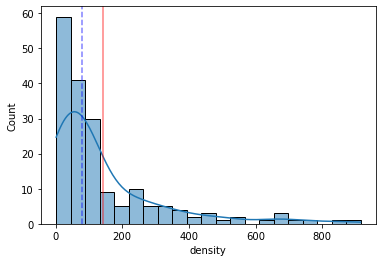

In [99]:
# here we can see density column is going rightward.
# and it is positive in relation.
sns.histplot(data=population['density'],kde=True)
plt.axvline(x=population.density.mean(),c='red', alpha=0.5, label='mean')
plt.axvline(x=population.density.median(), c='blue', alpha= 0.5, ls='--', label='median')

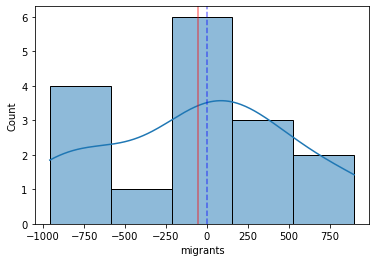

In [100]:
# checking migrant column but it is normally distributed. so, ther is no issue.
sns.histplot(data=population['migrants'],kde=True)
plt.axvline(x=population.migrants.mean(),c='red', alpha=0.5, label='mean')
plt.axvline(x=population.migrants.median(), c='blue', alpha= 0.5, ls='--', label='median')

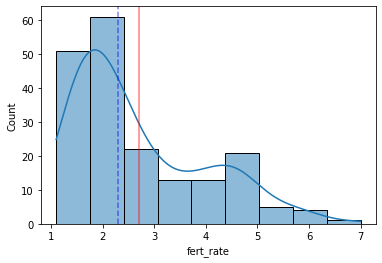

In [101]:
# here we can see that fertilty rate column is moving rightward or it is right skewed.
sns.histplot(data=population['fert_rate'],kde=True)
plt.axvline(x=population.fert_rate.mean(),c='red', alpha=0.5, label='mean')
plt.axvline(x=population.fert_rate.median(), c='blue', alpha= 0.5, ls='--', label='median')

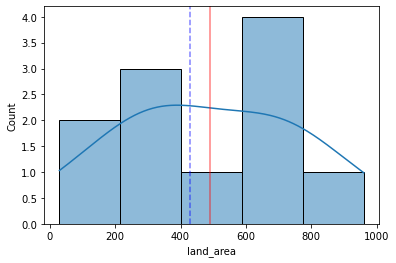

In [102]:
# the land area column is also normally distributed.
sns.histplot(data=population['land_area'],kde=True)
plt.axvline(x=population.land_area.mean(),c='red', alpha=0.5, label='mean')
plt.axvline(x=population.land_area.median(), c='blue', alpha= 0.5, ls='--', label='median')

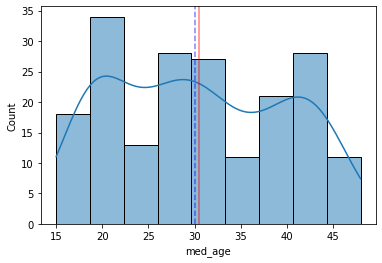

In [103]:
# med_age column is normally distributed.
sns.histplot(data=population['med_age'],kde=True)
plt.axvline(x=population.med_age.mean(),c='red', alpha=0.5, label='mean')
plt.axvline(x=population.med_age.median(), c='blue', alpha= 0.5, ls='--', label='median')

C:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


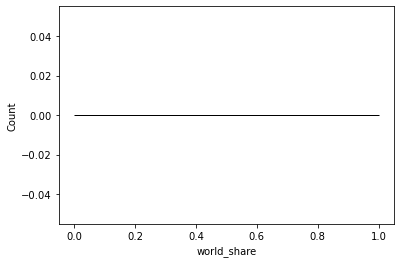

In [105]:
# here i did not get result in world share column.
sns.histplot(data=population['world_share'],kde=True)
plt.axvline(x=population.world_share.mean(),c='red', alpha=0.5, label='mean')
plt.axvline(x=population.world_share.median(), c='blue', alpha= 0.5, ls='--', label='median')

## report number of rows and columns

In [106]:
# here we have 382 rows and 11 columns.

population.shape

(382, 11)

## report the top three countries based on the density column.

In [107]:
top = population[['country','density']]  # selecting two column for further analysis.

In [108]:
# checking highest top 3 density in countries.
top_3 = top.nlargest(3,'density')
top_3

,country,density
381,Channel Islands,915.0
241,State of Palestine,847.0
345,Micronesia,784.0


## Which country has the highest fertility rate and which country has the lowest fertility rate?

In [109]:
fert_rate = population[['country','fert_rate']]      # selecting two column for further analysis.

In [110]:
fert_rate.nsmallest(1,'fert_rate')   # taking less fert_rate country.

,country,fert_rate
55,South Korea,1.1


In [111]:
fert_rate.nlargest(1,'fert_rate')    # taking highest fert_rate country.

,country,fert_rate
111,Niger,7.0


## Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.

In [112]:
pair_plot = population[['population','med_age','urban_pop','yearly_change']]    # selecting four column for further analysis

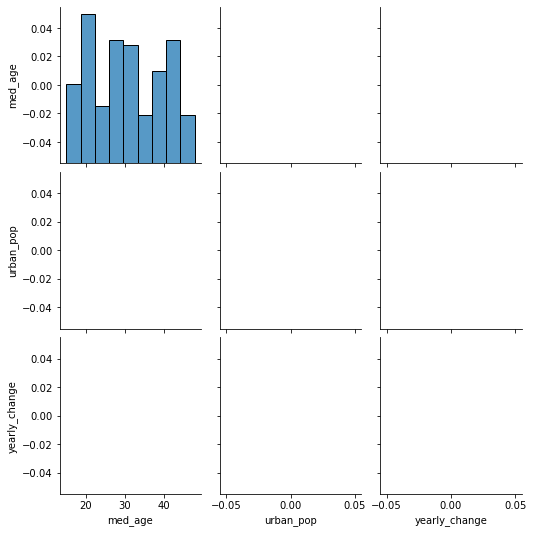

In [113]:
sns.pairplot(pair_plot)    # using pair plot to check the numeric relationship and histogram plot also.
                           # i have used this plot because it is easy to understand, handle etc.

## sort the population column based on lowest populated countries.

In [114]:
population.sort_values(by=['population'])    # here i am sorting the dataset according to the population.
                                             # here we can see population column is increasing row by row.

,country,population,yearly_change,net_change,density,land_area,migrants,fert_rate,med_age,urban_pop,world_share
317,Eswatini,"1,160,164",NaN,NaN,67.0,NaN,NaN,3.0,21.0,NaN,NaN
315,Cyprus,"1,207,359",NaN,NaN,131.0,NaN,NaN,1.3,37.0,NaN,NaN
313,Mauritius,"1,271,768",NaN,NaN,626.0,NaN,0.0,1.4,37.0,NaN,NaN
311,Timor-Leste,"1,318,445",NaN,NaN,89.0,NaN,NaN,4.1,21.0,NaN,NaN
309,Estonia,"1,326,535",NaN,887.0,31.0,NaN,NaN,1.6,42.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
